In [3]:
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
import nilearn.decomposition
import nilearn.plotting
import nilearn.image

In [23]:
#load background (defaced mri) 
file_source = ('C:/Users/user/Downloads/fmri/')

bg_path = file_source + 'defaced_t1w.nii.gz'
bg_img = nib.load(bg_path)

#load functional data 
img_path = file_source + 'fmcpr.up.nii.gz'
img = nib.load(img_path)

#load mask 
mask_path = file_source + 'aparc+aseg.func.mgz'
loaded_mask = nib.load(mask_path)

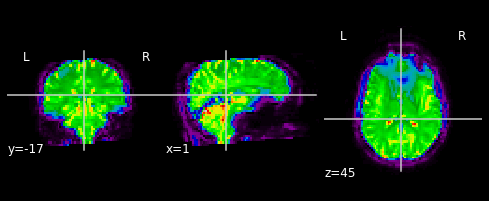

In [25]:
#computing the mask
mask_brain = nilearn.masking.compute_epi_mask(loaded_mask)

#plotting the mean functional image 
mean_fimg = nilearn.image.image.mean_img(img)
nilearn.plotting.plot_epi(mean_fimg)

In [26]:
#selecting cortical areas in the mask 
masker = nilearn.image.math_img(("img>999"), img=loaded_mask)

#time series for cortical functional data only
cortical_timeseries = nilearn.masking.apply_mask(img, masker)

In [34]:
#selecting the number of components 
n_comp = 5 

# perform ICA 
ica = nilearn.decomposition.CanICA(n_components=n_comp,memory="nilearn_cache", memory_level=2,
                verbose=1,random_state=0,mask_strategy='epi')
ica.fit(img)

[MultiNiftiMasker.fit] Loading data from [Nifti1Image('C:/Users/user/Downloads/fmri/fmcpr.up.nii.gz')]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[Memory]0.0s, 0.0min    : Loading randomized_svd...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...
[Memory]0.0s, 0.0min    : Loading fastica...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


CanICA(memory=Memory(location=nilearn_cache\joblib), memory_level=2,
       n_components=5, random_state=0, verbose=2)

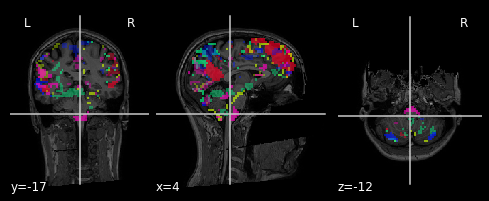

In [37]:
# exctract a 3D representation of the components and plot
components_img=ica.components_img_
nilearn.plotting.plot_prob_atlas(components_img, bg_img=bg_img)
